<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/simulation/PDE_BVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 前準備 (可視化等)

タイマー関数

In [16]:
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print(f'[{name}] done in {time.time() - t0:.0f} s')

## 1次元：シュレディンガー方程式の定常解

- 境界値問題として解く (定常状態)
- 境界条件は固定端条件 (無限井戸型ポテンシャル)
- 解くのは固有値問題

シュレディンガー方程式は
\begin{equation}
  \left(-\frac{\hbar^2}{2m}\nabla^2+U(x)\right) \psi(x) = E \psi(x)
\end{equation}
である。
1次元の場合に適切に無次元化すると
\begin{equation}
  \left(-\frac{d^2}{dx^2}+U(x)\right)\psi(x)=E\psi
\end{equation}
となる。
ハミルトニアンに含まれる2階微分の単純な差分表示は
\begin{equation}
\begin{split}
  &\left.\frac{d^2}{dx^2}\psi(x)\right|_{x=x_i}
  \sim\left.\frac{d}{dx}\frac{\psi(x+a/2)-\psi(x-a/2)}{a}\right|_{x=x_i} \\
  &\sim\left.\frac{d}{dx}\frac{\psi(x+a/2)-\psi(x-a/2)}{a}\right|_{x=x_i} \\
  &\sim\frac{\psi(x_i+a)-2\psi(x_i)+\psi(x_i-a)}{a^2}
\end{split}  
\end{equation}
となる。
これはいわゆるハミルトニアンの行列表示である。

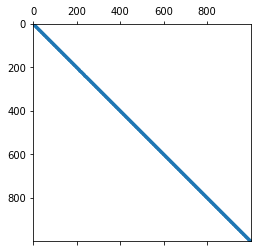

In [17]:
from scipy import sparse
import matplotlib.pyplot as plt

a = 0.01
N = 1000
hamiltonian = (-sparse.eye(N,k=1) + 2 * sparse.identity(N) 
               -sparse.eye(N,k=-1)) / a**2
plt.spy(hamiltonian, markersize=1)

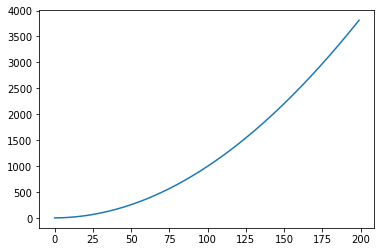

In [18]:
from scipy.sparse import linalg
import numpy as np

sn = 200
eigenvalues, eigenvectors = linalg.eigsh(hamiltonian, k=sn, which="SM")
eigenvectors = np.transpose(eigenvectors)

level = np.arange(sn)
print()
plt.plot(level, eigenvalues[level])

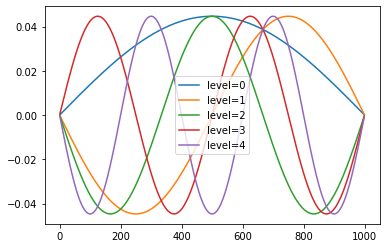

In [19]:
for i in range(5):
    plt.plot(eigenvectors[i], label='level=%d' %i)
plt.legend()

## 2次元：ポアソン方程式

- 境界値問題として解く
- 2次元空間
- 境界条件は固定端条件 (端で0)
- 解くのは連立1次方程式

状況は[こちら](https://takun-physics.net/10186/)と同じ。
\begin{equation}
\left(\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}\right)
p(x,y)=b(x,y)
\end{equation}
を解く。

グリッドは$N_x×N_y$にとって
\begin{equation}
p(x_0+i\Delta x, y_0+j\Delta y)≡p(x_i,y_j)≡p_{ij}\equiv p_{i+j×N_x}
\end{equation}
と差分化した未知変数をベクトル形式にする。
シュレディンガー方程式の場合と同様に差分を実施する。

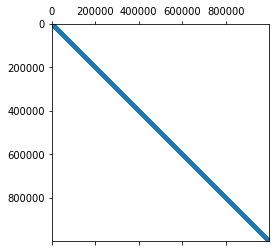

In [20]:
from scipy import sparse
import matplotlib.pyplot as plt

a = 0.01
N = 1000

operator = -4 * sparse.identity(N*N) / a**2 
operator += sparse.eye(N*N,k=1) / a**2
operator += sparse.eye(N*N,k=-1) / a**2
operator += sparse.eye(N*N, k=N) / a**2
operator += sparse.eye(N*N, k=-N) / a**2

plt.spy(operator, markersize=1)

In [ ]:
import numpy as np
from scipy.sparse import linalg

source = np.zeros(N*N)
source[int(N/4 + N * N/4)] = 100
source[int(3/4*N + N * 3/4*N)] = -100

with timer("CG method"):
    x, _ = linalg.cg(-operator, -source)

In [ ]:
import matplotlib.pyplot as plt

solution_mat = np.array([[ x[row_idx + col_idx * N] for row_idx in range(N)] 
                         for col_idx in range(N)])
plt.imshow(solution_mat)
plt.show()